In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import json

In [2]:
from load_data import load_annotation, load_mouselight

In [3]:
(axons, dendrites) = load_mouselight('AA0001')

In [4]:
len(axons)

11145

In [5]:
len(dendrites)

954

In [11]:
axons.head()

,sampleNumber,structureIdentifier,x,y,z,radius,parentNumber,allenId
0,1,1,4625.382188,2534.794722,2977.331688,1,-1,974
1,2,2,4626.080429,2543.495381,2998.328900,1,1,974
2,3,2,4627.360984,2543.799307,3003.055208,1,2,974
3,4,2,4626.503281,2549.596586,3005.326501,1,3,974
4,5,2,4626.503281,2549.089941,3005.326501,1,4,974


Text(0.5, 0, 'z (um)')

<Figure size 576x576 with 0 Axes>

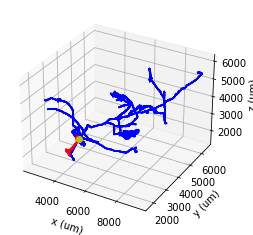

In [7]:
#3D plot of axons and dendrites
plt.figure(figsize=(8,8))
ax = plt.figure().add_subplot(projection='3d')
for index, row in axons[1:].iterrows():
    parent = axons[axons.sampleNumber==row.parentNumber].index
    ax.plot([axons.x[parent].values[0], row.x], [axons.y[parent].values[0], row.y], [axons.z[parent].values[0], row.z], color='b')
for index, row in dendrites[1:].iterrows():
    parent = dendrites[dendrites.sampleNumber==row.parentNumber].index
    ax.plot([dendrites.x[parent].values[0], row.x], [dendrites.y[parent].values[0], row.y], [dendrites.z[parent].values[0], row.z], color='r')
ax.plot(axons.x.loc[0], axons.y.loc[0], axons.z.loc[0], color='y', marker='o')
ax.set_xlabel("x (um)")
ax.set_ylabel("y (um)")
ax.set_zlabel("z (um)")

In [8]:
def plot_two_axes(first_axis, second_axis):
    for index, row in axons[1:].iterrows():
        parent = axons[axons.sampleNumber==row.parentNumber].index
        plt.plot([axons[first_axis][parent].values[0], row[first_axis]], [axons[second_axis][parent].values[0], row[second_axis]], color='b')
    for index, row in dendrites[1:].iterrows():
        parent = dendrites[dendrites.sampleNumber==row.parentNumber].index
        plt.plot([dendrites[first_axis][parent].values[0], row[first_axis]], [dendrites[second_axis][parent].values[0], row[second_axis]], color='r')
    plt.plot(axons[first_axis].loc[0], axons[second_axis].loc[0], color='y', marker='o')
    plt.xlabel(first_axis + " (um)")
    plt.ylabel(second_axis + " (um)")

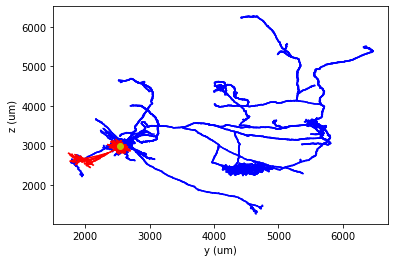

In [9]:
plot_two_axes("y", "z")

## Find axon end points

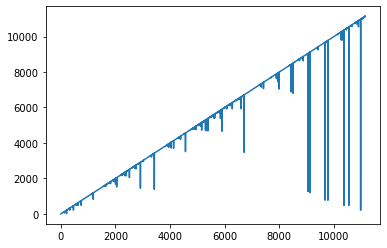

In [13]:
plt.plot(axons.parentNumber.values)
# plt.xlim(0,2000)

In [14]:
(axons.sampleNumber - axons.parentNumber).values>1

array([ True, False, False, ..., False,  True, False])

In [15]:
segment = (axons.sampleNumber - axons.parentNumber).values

In [53]:
endpoints = np.argwhere(segment>1).flatten() - 1

In [17]:
len(endpoints)

392

In [54]:
endpoints[:10]

array([ -1,  26, 130, 133, 187, 201, 205, 208, 209, 242])

### Calculate distance of each segment

In [6]:
def calculate_segment_length(data):
    lengtharray = np.zeros(len(data))
    for index, row in data[1:].iterrows():
        parent = data[data.sampleNumber==row.parentNumber].index
        length = np.sqrt(((data.x[parent]-row.x)**2) + ((data.y[parent]-row.y)**2) + ((data.z[parent]-row.z)**2))
        lengtharray[index] = length
    data['segmentLength'] = lengtharray

In [7]:
calculate_segment_length(axons)

<ipython-input-6-0504828f8f63>:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  lengtharray[index] = length


In [8]:
calculate_segment_length(dendrites)

<ipython-input-6-0504828f8f63>:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  lengtharray[index] = length


In [9]:
axons

,sampleNumber,structureIdentifier,x,y,z,radius,parentNumber,allenId,segmentLength
0,1,1,4625.382188,2534.794722,2977.331688,1,-1,974,0.000000
1,2,2,4626.080429,2543.495381,2998.328900,1,1,974,22.739216
2,3,2,4627.360984,2543.799307,3003.055208,1,2,974,4.906137
3,4,2,4626.503281,2549.596586,3005.326501,1,3,974,6.285132
4,5,2,4626.503281,2549.089941,3005.326501,1,4,974,0.506645
...,...,...,...,...,...,...,...,...,...
11140,11141,2,4794.368423,2548.953223,2901.451063,1,11140,974,7.714642
11141,11142,2,4797.375123,2550.219837,2899.195395,1,11141,974,3.966433
11142,11143,2,4797.108522,2554.857365,2895.267851,1,11142,974,6.083037
11143,11144,2,4768.487115,2434.095199,3024.112011,1,11117,625,6.593830


### CCF location of each endpoint

In [21]:
axons.allenId.unique()

array([      974,       625,       648,      1102,       945,       889,
             929, 484682512, 484682516,       893,       849,       857,
            1058,      1026,       882,       672,       579,      1022,
             803,         6,      1031,       924,       381,       313,
             128,       549,       422, 563807435,      1020,      1097,
             797,       685,       690,       366,       181,       741,
            1077,       364,       697,       574,       931,      1009,
             262,      1092,       718,       733,       930,       844,
            1021,       767, 526157196,       440, 526157192,       577,
             950,       657,       878,       450, 182305693,       854])

In [22]:
ccf_structures = pd.read_csv('/data/allen_mouse_ccf/annotation/adult_mouse_ccf_structures.csv')

In [23]:
ccf_structures.head()

,id,name,acronym,hemisphere_id,parent_structure_id,graph_order,structure_id_path,color_hex_triplet
0,1000,extrapyramidal fiber systems,eps,3,1009.0,1218,/997/1009/1000/,CCCCCC
1,223,Arcuate hypothalamic nucleus,ARH,3,157.0,733,/997/8/343/1129/1097/157/223/,FF5D50
2,12998,"Somatosensory areas, layer 6b",SS6b,3,453.0,36,/997/8/567/688/695/315/453/12998/,188064
3,163,"Agranular insular area, posterior part, layer 2/3",AIp2/3,3,111.0,287,/997/8/567/688/695/315/95/111/163/,219866
4,552,"Pontine reticular nucleus, ventral part",PRNv,3,987.0,914,/997/8/343/1065/771/987/552/,FFBA86


In [24]:
ccf_structures[ccf_structures.id==974]

,id,name,acronym,hemisphere_id,parent_structure_id,graph_order,structure_id_path,color_hex_triplet
1139,974,"Primary somatosensory area, mouth, layer 5",SSp-m5,3,345.0,76,/997/8/567/688/695/315/453/322/345/974/,188064


In [63]:
end_structures = axons.loc[endpoints[1:]].allenId.unique()

In [65]:
for structure in end_structures:
    print(ccf_structures[ccf_structures.id==structure].acronym)

876    SSp-ul5
Name: acronym, dtype: object
291    MOp5
Name: acronym, dtype: object
1139    SSp-m5
Name: acronym, dtype: object
1036    SSp-m6a
Name: acronym, dtype: object
430    VISC5
Name: acronym, dtype: object
661    CP
Name: acronym, dtype: object
486    ec
Name: acronym, dtype: object
599    PO
Name: acronym, dtype: object
35    SPFp
Name: acronym, dtype: object
117    MRN
Name: acronym, dtype: object
1249    VM
Name: acronym, dtype: object
851    VPMpc
Name: acronym, dtype: object
803    RE
Name: acronym, dtype: object
288    HY
Name: acronym, dtype: object
1225    PSTN
Name: acronym, dtype: object
1181    PG
Name: acronym, dtype: object
11    fiber tracts
Name: acronym, dtype: object
130    int
Name: acronym, dtype: object
16    RT
Name: acronym, dtype: object
149    TH
Name: acronym, dtype: object
663    SSp-ul6b
Name: acronym, dtype: object
246    SSp-ul6a
Name: acronym, dtype: object
891    scwm
Name: acronym, dtype: object
136    MOp6a
Name: acronym, dtype: object
1032   